In [28]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
# 데이터 파일
File_name = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\ML\mini_project\student_performance_prediction.csv'
studentDF = pd.read_csv(File_name)
studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


### 데이터 확인

In [30]:
studentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [31]:
studentDF.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [32]:
studentDF.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

### 데이터 전처리

In [33]:
# Study Hours per Week 값 Nan은 0으로 바꾸고, 양수만 남기기
values = {'Study Hours per Week':0}
studentDF.fillna(value=values,inplace=True)

studentDF = studentDF[studentDF['Study Hours per Week'] >= 0]
studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [34]:
# Attendance Rate 데이터 음수값, 100 초과값 날리기
mask = (studentDF['Attendance Rate']>0) & (studentDF['Attendance Rate']<=100)
studentDF=studentDF[mask]
studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [35]:
# Previous Grades => 100 초과값 날리기, Nan값 => 중앙값

# Participation in Extracurricular Activities => Nan값 -> no

# Parent Education Level => Nan값 => 중졸이하


mask = (studentDF['Previous Grades']<=100)
studentDF=studentDF[mask].copy()

values = {'Previous Grades':65.2,'Participation in Extracurricular Activities':'No','Parent Education Level':'Under_Middle'}
studentDF.fillna(value=values,inplace=True)

studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [36]:
# Passed => Nan값 날리기
studentDF=studentDF.dropna(subset=['Passed'], how='any', axis=0)
studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [37]:
studentDF.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [38]:
studentDF.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,29477.000000,29477.000000,29477.000000
mean,9.729386,70.990413,64.657872
std,5.113606,16.814976,14.488412
min,0.000000,0.500000,8.300000
25%,6.200000,59.800000,54.900000
50%,9.800000,72.400000,64.900000
75%,13.300000,84.000000,74.700000
max,32.400000,100.000000,100.000000


In [39]:
studentDF['Parent Education Level'].value_counts()

Parent Education Level
Bachelor        5674
Associate       5639
Doctorate       5630
High School     5602
Master          5478
Under_Middle    1454
Name: count, dtype: int64

In [40]:
studentDF['Participation in Extracurricular Activities'].value_counts()

Participation in Extracurricular Activities
No     15479
Yes    13998
Name: count, dtype: int64

### 데이터 분석 (KNN)


* 인코딩

In [41]:
# Parent Education Level 인코딩
studentDF['Parent Education Level']=studentDF['Parent Education Level'].replace({'Under_Middle':0,
                                             'High School':1,
                                             'Associate':2,
                                             'Bachelor':3,
                                             'Master':4,
                                             'Doctorate':5})
studentDF['Parent Education Level'].value_counts()

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_14356\1515439228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentDF['Parent Education Level']=studentDF['Parent Education Level'].replace({'Under_Middle':0,


Parent Education Level
3    5674
2    5639
5    5630
1    5602
4    5478
0    1454
Name: count, dtype: int64

In [42]:
# Participation in Extracurricular Activities 인코딩
studentDF['Participation in Extracurricular Activities']=studentDF['Participation in Extracurricular Activities'].replace({'No':0,'Yes':1})
studentDF['Participation in Extracurricular Activities'].value_counts()

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_14356\3488316061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentDF['Participation in Extracurricular Activities']=studentDF['Participation in Extracurricular Activities'].replace({'No':0,'Yes':1})


Participation in Extracurricular Activities
0    15479
1    13998
Name: count, dtype: int64

In [43]:
Features = studentDF.iloc[:,1:-1]
targetSR = studentDF.iloc[:,-1]
Features

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level
1,9.3,95.3,60.6,0,1
3,17.6,76.8,62.4,1,3
4,8.8,89.3,72.7,0,4
5,8.8,73.8,69.3,1,1
6,17.9,38.6,93.6,0,5
...,...,...,...,...,...
39994,5.1,92.1,46.1,1,5
39995,15.6,93.8,51.4,1,4
39996,11.3,66.4,64.2,0,5
39997,13.1,65.6,38.1,0,3


In [44]:
# label 인코딩을 통해 target 인코딩해주기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(targetSR)
lable_encoded = le.transform(targetSR)
targetSR= pd.Series(lable_encoded)
targetSR

0        0
1        0
2        0
3        1
4        1
        ..
29472    0
29473    0
29474    1
29475    0
29476    1
Length: 29477, dtype: int32

- 수치형 변수 scaling

In [45]:
X_train,X_test,y_train,y_test = train_test_split(Features,
                                                 targetSR,
                                                 stratify=targetSR,
                                                 random_state=777)

In [46]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (22107, 5),2D
y_train : (22107,),1D
X_test : (7370, 5),2D
y_test : (7370,),1D


In [47]:
# 모델 인스턴스 만들기
mmScaler = MinMaxScaler()

In [48]:
# 모델 학습
mmScaler = mmScaler.fit(X_train)

In [49]:
## joblib 이용한 스케일러 저장
import joblib
file_name = 'Pre_result_mmScaler.pkl'
joblib.dump(mmScaler,file_name)

['Pre_result_mmScaler.pkl']

In [50]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

### 모델 만들기

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [52]:
neigh.score(X_test_scaled,y_test)

0.5059701492537313

[6] 최적의 K개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [53]:
# # K의 범위 : 1 ~ 전체 데이터 개수

# scores, points = [], []
# for k in range(1,200):
#     # 최근접 이웃 데이터 수 설정
#     neigh.n_neighbors = k

#     # 모델 예측 값 추정
#     neigh.fit(X_train_scaled, y_train)
#     # 이 부분은 생략해도 상관없음. 데이터 셋이 많으면 시간만 걸리는 부분

#     # 점수 계산 및 저장
#     jumsu = neigh.score(X_test_scaled,y_test)
#     # print(f'[{k}] jumsu => {jumsu}')

#     if k>1:
#         if jumsu != scores[-1]: points.append(k)
#     scores.append(jumsu)


In [54]:
# points

In [55]:
# # X축 k, y축 점수
# plt.plot(range(1,200),scores)
# plt.xlabel('K')
# plt.ylabel('scores')
# #plt.axvline(points[0]-1,0.0,1.0,color='r',linestyle='dashed')
# #              |
# #          값이 떨어지는 부분 찾음.
# plt.show()

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
y_true = y_test

In [58]:
y_test_pre = neigh.predict(X_test_scaled)

In [59]:
# confusion_matrix
con_met = confusion_matrix(y_true,y_test_pre)
con_met

array([[1852, 1849],
       [1792, 1877]], dtype=int64)

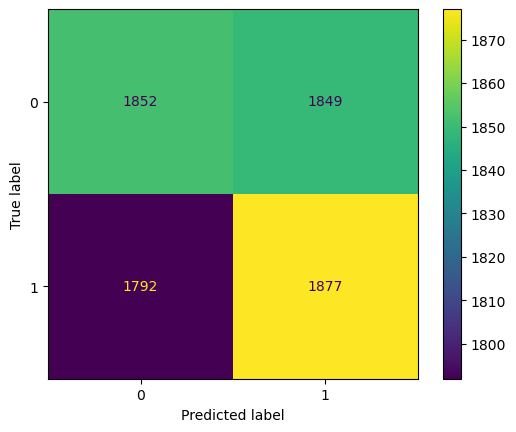

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
Confusion = ConfusionMatrixDisplay(confusion_matrix=con_met,
                       display_labels=neigh.classes_)
Confusion.plot()
plt.show()

In [61]:
neigh.classes_,  neigh.n_samples_fit_

(array([0, 1]), 22107)

In [62]:
from sklearn.model_selection import GridSearchCV

#### KNN 하이퍼파라미터 건드리기

In [63]:
grid_params = {
    'n_neighbors' : list(range(1,100)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [64]:
# gs = GridSearchCV(neigh, grid_params, cv=10)
# gs.fit(X_train_scaled, y_train)
# print("Best Parameters : ", gs.best_params_)
# print("Best Score : ", gs.best_score_)
# print("Best Test Score : ", gs.score(X_test_scaled, y_test))

In [65]:
best_model = KNeighborsClassifier(n_neighbors=73,metric= 'euclidean',weights ='uniform')
best_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=73)

In [66]:
best_model.score(X_test_scaled,y_test)

0.5112618724559023

In [67]:
y_test_pre = best_model.predict(X_test_scaled)

In [68]:
# confusion_matrix
con_met = confusion_matrix(y_true,y_test_pre)
con_met

array([[1915, 1786],
       [1816, 1853]], dtype=int64)

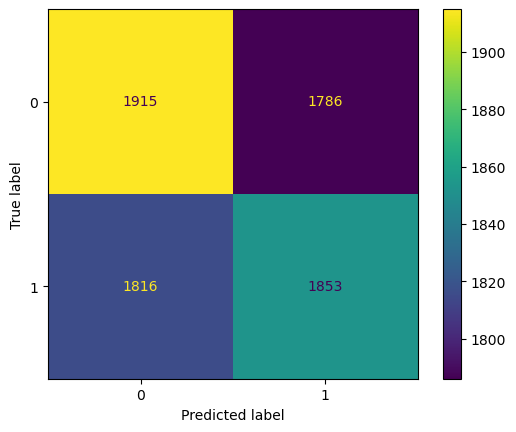

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
Confusion = ConfusionMatrixDisplay(confusion_matrix=con_met,
                       display_labels=best_model.classes_)
Confusion.plot()
plt.show()

In [70]:
import joblib
# 모델 저장
joblib.dump(best_model,'best_model.joblib')
# 스케일러 저장
joblib.dump(mmScaler,'mmScaler.joblib')


['mmScaler.joblib']

In [71]:
loaded_model = joblib.load('best_model.joblib')
loaded_scaler = joblib.load('mmScaler.joblib')

In [74]:
sc= loaded_scaler

In [75]:
sc

MinMaxScaler()